In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.stattools import durbin_watson

In [2]:
df = pd.read_csv("tech_companies_salary.csv")
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,09-09-2018 11:52,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,...,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
df.tail()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
62637,09-09-2018 11:52,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,...,0,0,0,0,0,0,0,0,NaN,NaN
62641,1/29/2019 5:12:59,apple,ict3,Software Engineer,200000,"Sunnyvale, CA",0.0,0.0,ML / AI,155000,...,0,0,0,0,0,0,0,0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62519 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61772 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40134 non-null  object 
 14  cityid                

In [6]:
df.nunique()

timestamp                  61755
company                     1631
level                       2915
title                         15
totalyearlycompensation      893
location                    1050
yearsofexperience             65
yearsatcompany                81
tag                         3057
basesalary                   482
stockgrantvalue              612
bonus                        335
gender                         4
otherdetails               12838
cityid                      1045
dmaid                        149
rowNumber                  62642
Masters_Degree                 2
Bachelors_Degree               2
Doctorate_Degree               2
Highschool                     2
Some_College                   2
Race_Asian                     2
Race_White                     2
Race_Two_Or_More               2
Race_Black                     2
Race_Hispanic                  2
Race                           5
Education                      5
dtype: int64

In [7]:
df.duplicated().value_counts()

False    62642
Name: count, dtype: int64

In [8]:
df.shape

(62642, 29)

In [9]:
df.size

1816618

In [10]:
df = df.dropna()

In [11]:
#removing all columns with unnecessary data and columns containing data not pertinent to the target variable
df = df.drop(['tag', 'timestamp', 'company', 'level', 'title',
                'otherdetails', 'cityid', 'dmaid', 'rowNumber',
                'Education', 'location', 'stockgrantvalue',
                'bonus', 'totalyearlycompensation', 'Race', 'Race_Asian', 'Race_White', 'Race_Black', 'Race_Two_Or_More', 'Race_Hispanic'], axis=1)

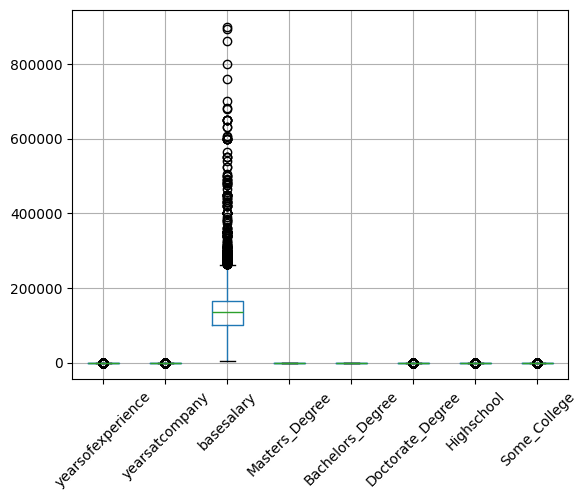

In [12]:
#Exploratory boxplot of quantitative variables to determine the presence of any outliers
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [13]:
#cleaning dataset of outliers by setting thresholds
dfclean = df[(df["yearsofexperience"] < 17.5)&(df["yearsatcompany"] < 7.5)&((df["basesalary"] < 220000)&(df["basesalary"]>35000))]
#decided thresholds based upon the top line of boxplots

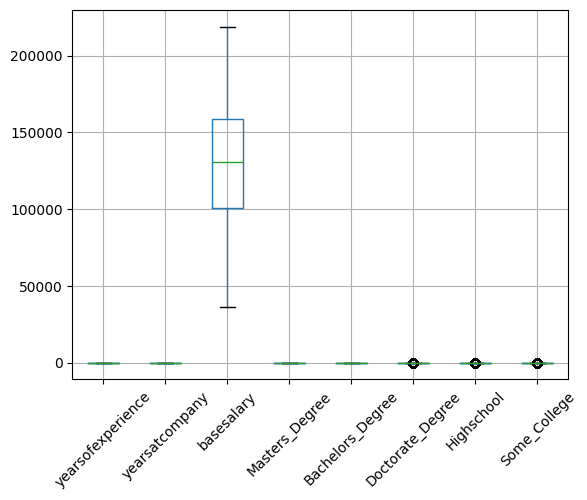

In [14]:
#boxplot of cleaned dataset
dfclean.boxplot()
plt.xticks(rotation=45)
plt.show()

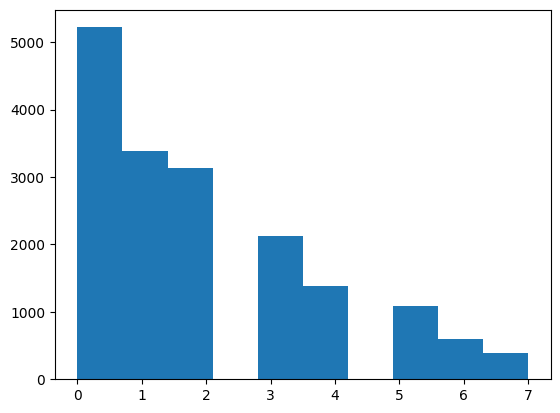

In [15]:
x = dfclean['yearsatcompany']
plt.hist(x)
plt.show()

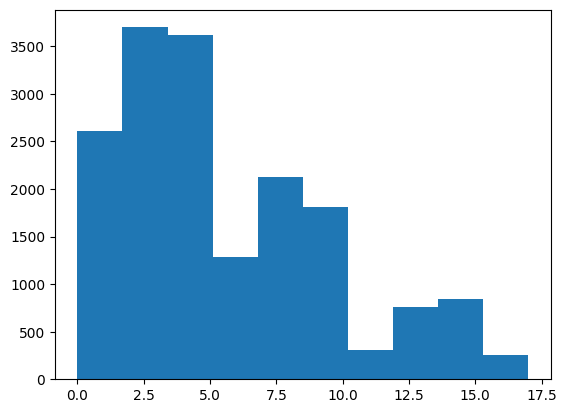

In [16]:
x = dfclean['yearsofexperience']
plt.hist(x)
plt.show()

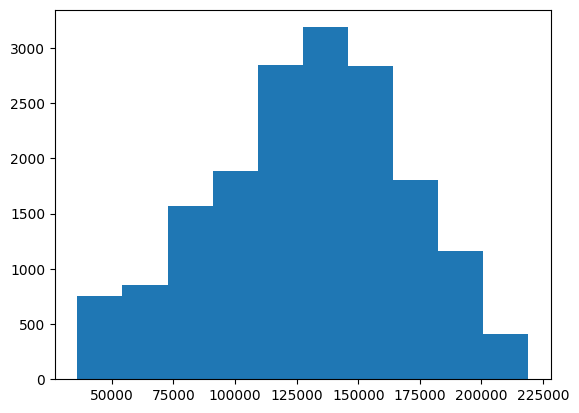

In [17]:
x = dfclean['basesalary']
plt.hist(x)
plt.show()

In [18]:
encodedData = pd.get_dummies(dfclean, columns=['gender'], prefix='gender', dtype=int)
encodedData.columns

Index(['yearsofexperience', 'yearsatcompany', 'basesalary', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'gender_Female', 'gender_Male', 'gender_Other'],
      dtype='object')

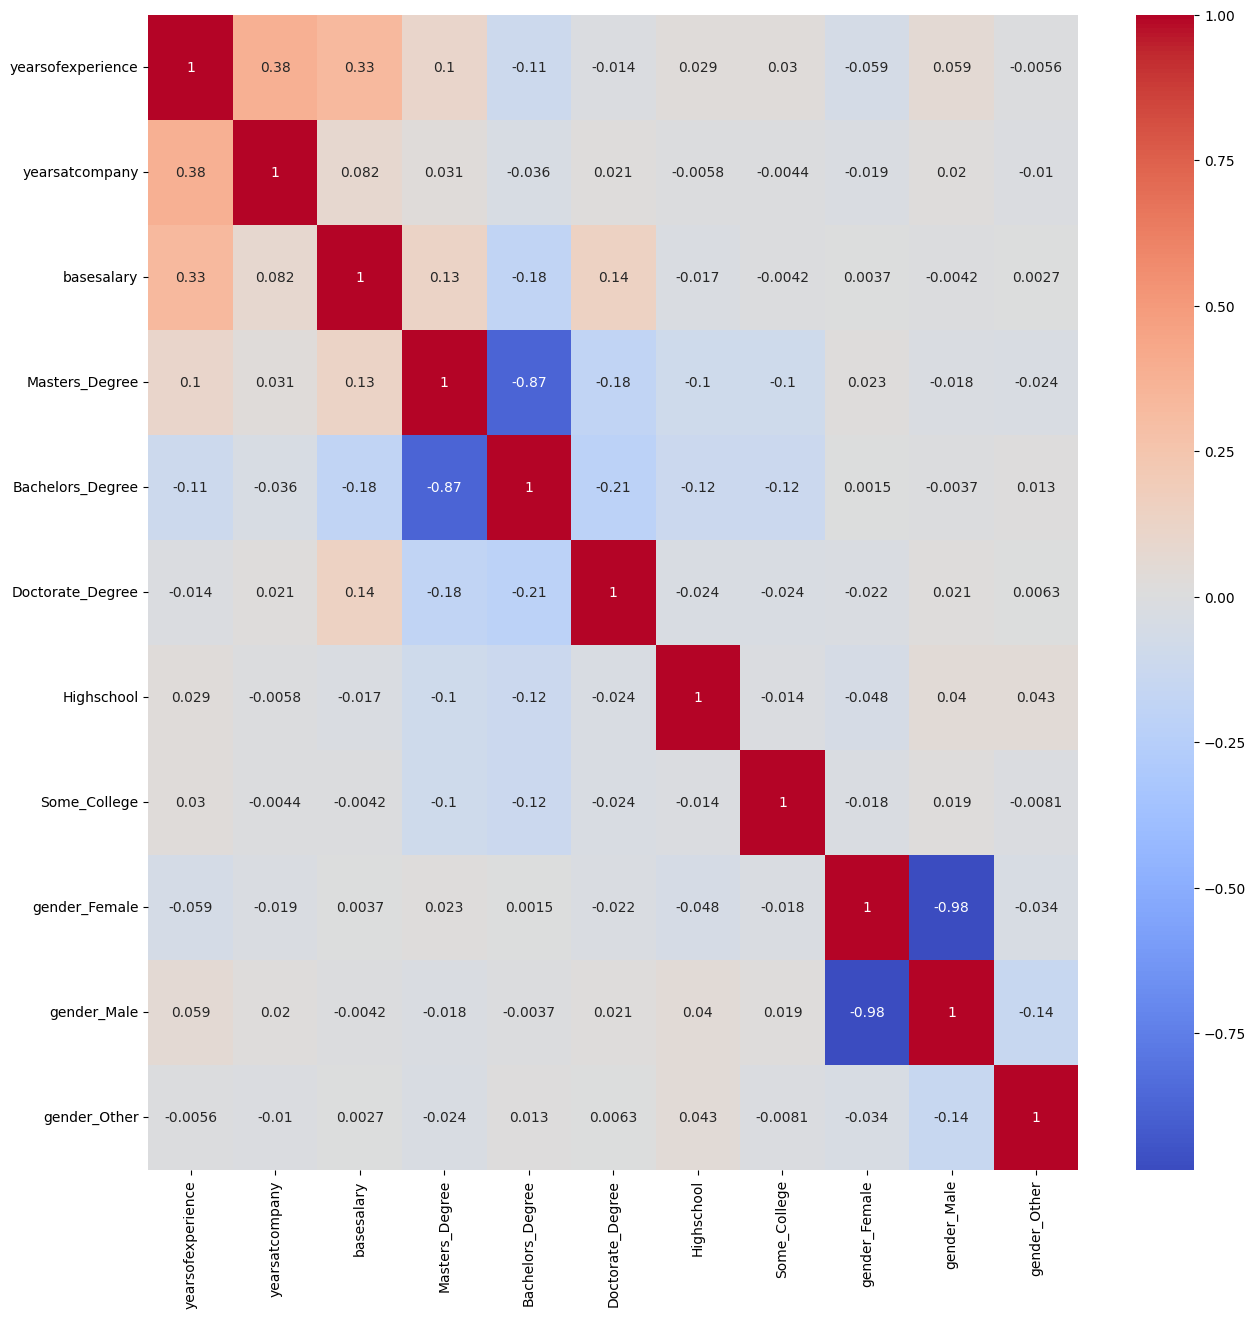

In [19]:
correlationMatrix = encodedData.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.show()

In [20]:
X = encodedData.drop('basesalary', axis=1)
y = encodedData['basesalary']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [23]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             basesalary   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     241.1
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:43:58   Log-Likelihood:            -1.4470e+05
No. Observations:               12127   AIC:                         2.894e+05
Df Residuals:                   12117   BIC:                         2.895e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.734e+04    1.6e+0

**Looking at the prelimnary training data, the only two predictors that have a statistically significant impact on base salary are years of experience and years at company as their P values are less than 0.005.**

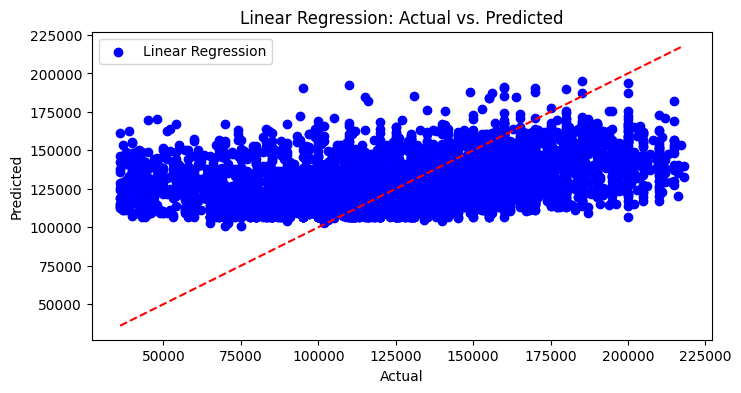

In [24]:
predict = model.predict(X_test)
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)
rmse = np.sqrt(mse)

plt.figure(figsize=(8, 4))
plt.scatter(y_test, predict, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

**This Actual versus Predicted graph acts as a showing of the homoscedacity of the model.**

In [25]:
print("MSE: {}".format(mse))
print("MAE: {}".format(mae))
print("RMSE: {}".format(rmse))

MSE: 1359730277.308509
MAE: 29123.082953054694
RMSE: 36874.52070615304


**As the adusted R-Squared is less than 0.5 (0.152) and the RMSE is quite high at 36864, the Linear Regression model does not fit this dataset well at all, and does a poor job at predicting base salary from the given predictor variables.**

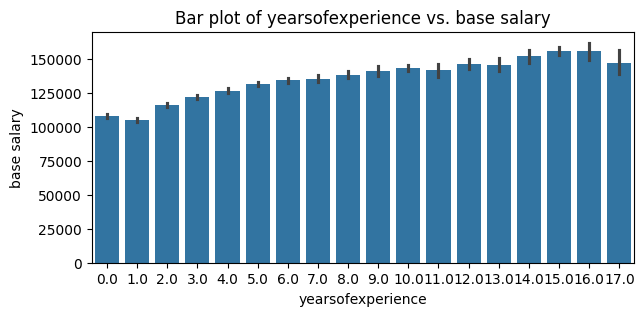

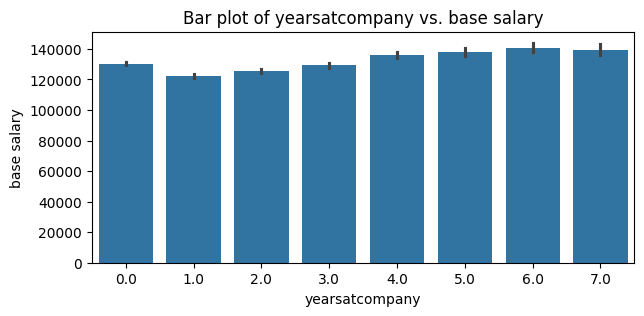

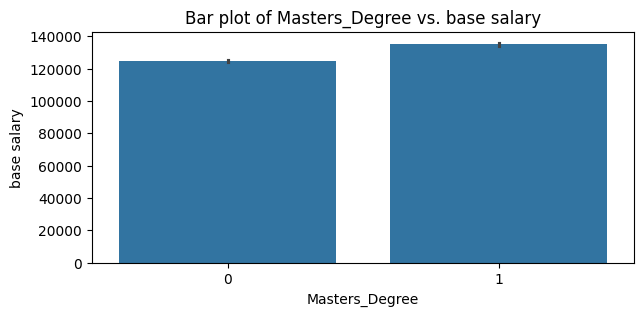

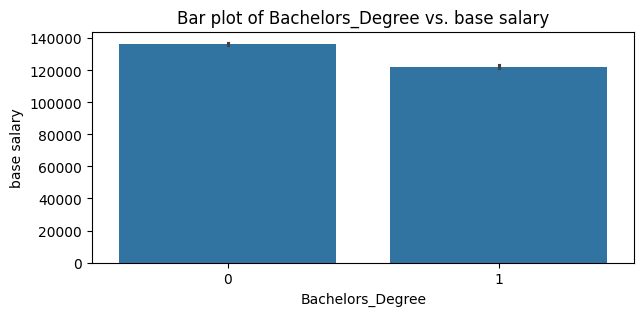

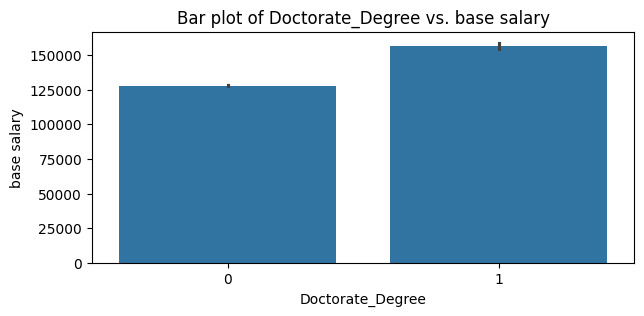

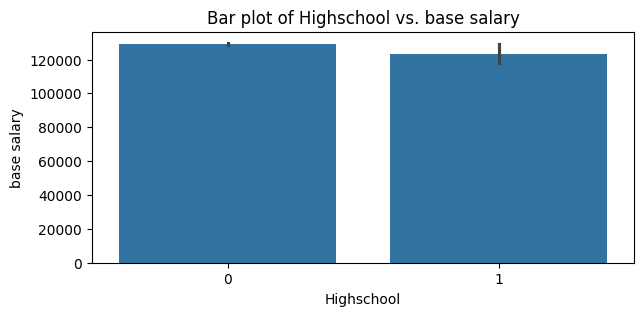

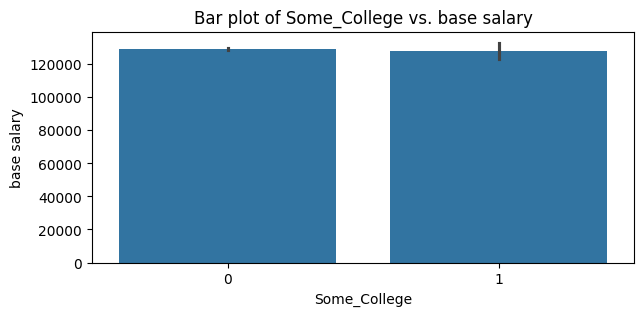

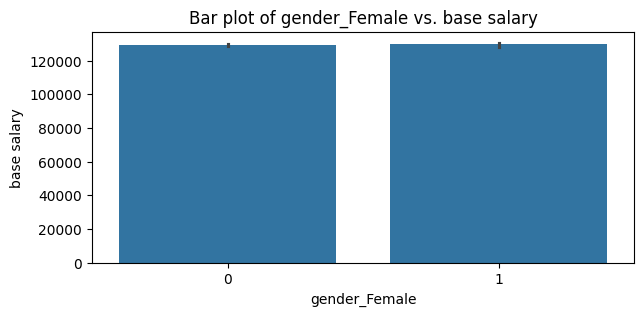

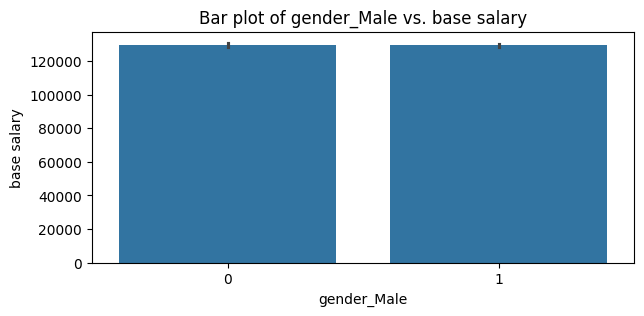

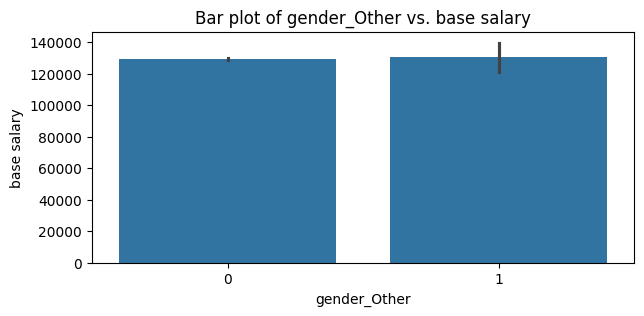

In [26]:
for feature in X.columns:
    plt.figure(figsize=(7, 3))
    sns.barplot(x=X[feature], y=y)
    plt.title(f'Bar plot of {feature} vs. base salary')
    plt.xlabel(f'{feature}')
    plt.ylabel('base salary')
    plt.show()

**No clear linear relationships between any variables and base salary, however there is a slight linear relationship with years of experience.**

In [27]:
durbin_watson_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {durbin_watson_stat}")

Durbin-Watson statistic: 1.9768519719938278


**As the Durbin-Watson Statistic is extremely close to 2, this suggests that there is an absence of autocorrelation and errors are independent cases.**

**CONTINGENCY TABLE**

Make separate models for yearsofexperience (including years at company) and base salary, education and base salary, gender and base salary

Different linear regression techniques versus least squares